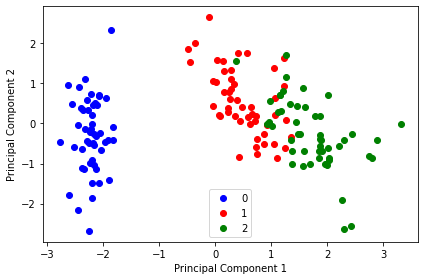

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# 1. Load the data and normalize it
iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X = sc.fit_transform(X)

# 2. Compute the covariance matrix
covariance_matrix = np.cov(X.T)

# 3. Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 4. Sort the eigenvalues and corresponding eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# 5. Get the 2 largest eigenvalues and their corresponding eigenvectors
# Here, "2" is the number of principal components we want
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))

# 6. Project the data onto the new dimension
X_pca = X.dot(W)

# Plot the projected data
plt.figure(figsize=(6, 4))
for lab, col in zip((0, 1, 2), ('blue', 'red', 'green')):
    plt.scatter(X_pca[y==lab, 0], X_pca[y==lab, 1], label=lab, c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()
